# TASK - 3 To explore Unsupervised Learning  [The Sparks Foundation]

### Problem Statement :

#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report

### Getting the Iris-Dataset

In [2]:
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset.shape

(150, 6)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Splitting the dataset

In [7]:
X = dataset.iloc[:,:5]
y = dataset.iloc[:,5:]

In [8]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [9]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


### Visualizing Dataset

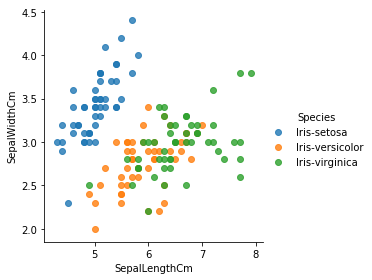

In [10]:
sns.lmplot(x = 'SepalLengthCm',y = 'SepalWidthCm',data = dataset, hue = 'Species',fit_reg=False, height=4,aspect=1)

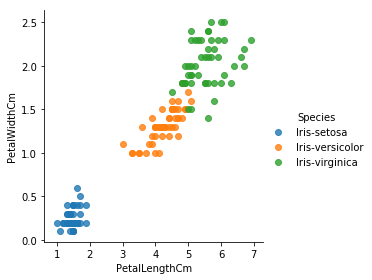

In [11]:
sns.lmplot(x = 'PetalLengthCm',y = 'PetalWidthCm',data = dataset, hue = 'Species',fit_reg=False, height=4,aspect=1)

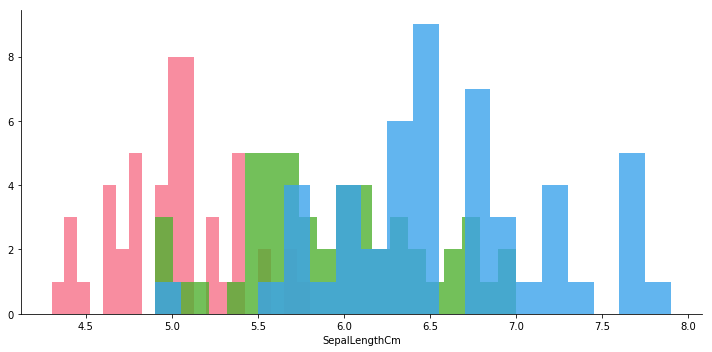

In [12]:
g = sns.FacetGrid(dataset,hue='Species', palette='husl',height=5,aspect=2,legend_out=True)
g = g.map(plt.hist, 'SepalLengthCm', bins=20,alpha = 0.8)

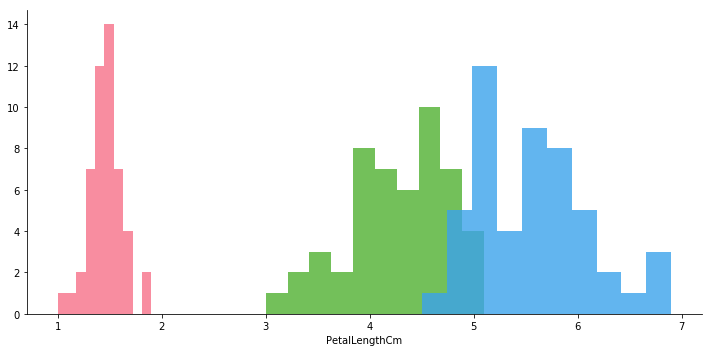

In [13]:
g = sns.FacetGrid(dataset,hue='Species', palette='husl',height=5,aspect=2,legend_out=True)
g = g.map(plt.hist, 'PetalLengthCm', bins=10,alpha = 0.8)

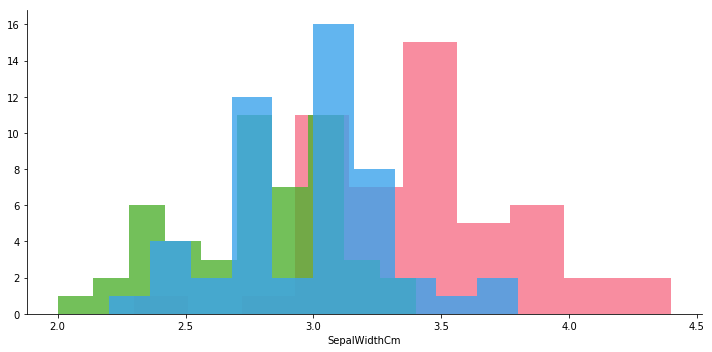

In [14]:
g = sns.FacetGrid(dataset,hue='Species', palette='husl',height=5,aspect=2,legend_out=True)
g = g.map(plt.hist, 'SepalWidthCm', bins=10,alpha = 0.8)

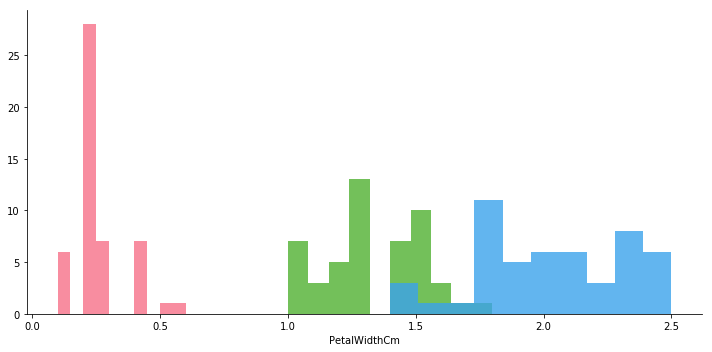

In [15]:
g = sns.FacetGrid(dataset,hue='Species', palette='husl',height=5,aspect=2,legend_out=True)
g = g.map(plt.hist, 'PetalWidthCm', bins=10,alpha = 0.8)

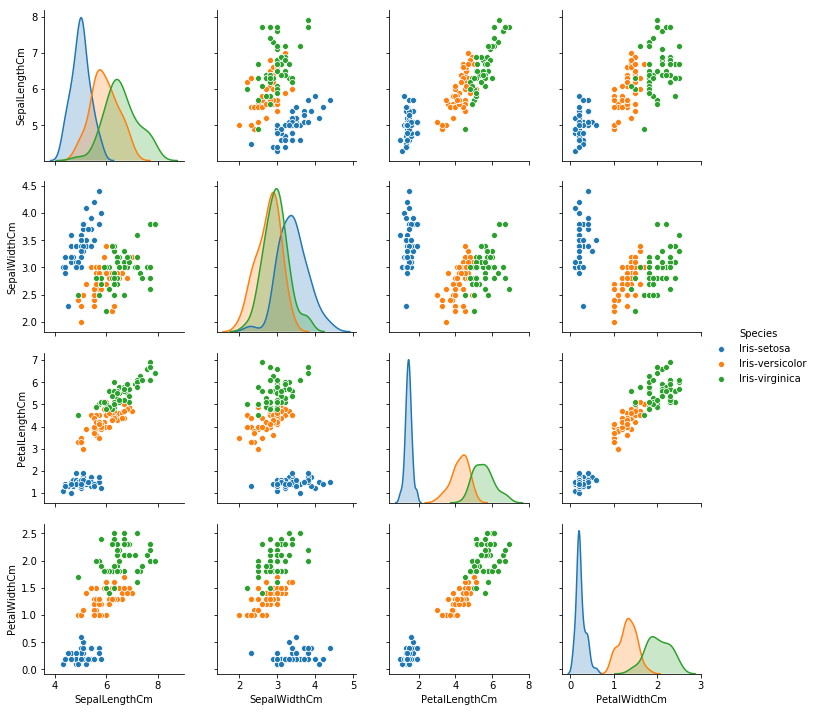

In [16]:
sns.pairplot(dataset.iloc[:,[1,2,3,4,5]],hue='Species')

### Applying K-Means 

In [17]:
kmeans = KMeans(n_clusters=3)

In [18]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
kmeans.cluster_centers_

array([[ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326],
       [125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 25.5  ,   5.006,   3.418,   1.464,   0.244]])

In [20]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Applying K-Means using Elbow Method

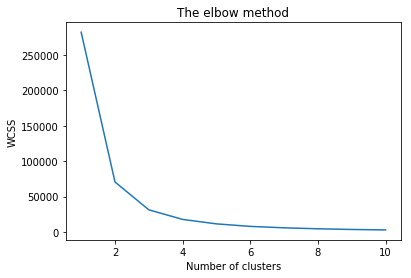

In [21]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Applying Kmeans to the dataset

In [22]:
#Applying Kmeans to the dataset
kmeans = KMeans(n_clusters=3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the K-Means Clusttering

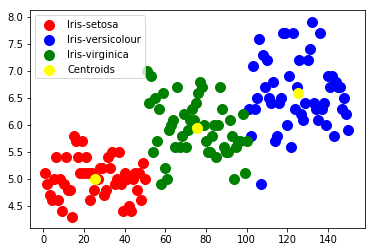

In [23]:
# Visualising the clusters - On the first two columns
X = dataset.iloc[:,:5].values
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()

### Evaluation 

In [24]:
def converter(species):
    if species == 'Iris-setosa':
        return 0
    elif species == 'Iris-versicolor':
        return 2
    elif species == 'Iris-virginica':
        return 1

In [25]:
dataset['Cluster'] = dataset['Species'].apply(converter)

In [26]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [27]:
print(confusion_matrix(dataset['Cluster'],kmeans.labels_))
print("\n")
print(classification_report(dataset['Cluster'],kmeans.labels_))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

   micro avg       1.00      1.00      1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

